# Unified Mentor data analytics internship


Project 1- Analyzing Amazon Sales Data


Name- Gayatri Ballal

In [1]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df=pd.read_csv("C:/Users/HP/Desktop/Amazon Sales data.csv")

In [3]:
#Number of rows and column in the data
df.shape

(100, 14)

In [4]:
#Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


# Data Cleaning 

In [5]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


There is no any missing value or null value present in the data.Dta is already cleaned.

In [6]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
# Extract Year and Month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Data Analysis

In [8]:
# Calculate the total profit
total_profit = df['Total Profit'].sum()
print("Total Profit:", total_profit)

Total Profit: 44168198.39999999


In [9]:
# Calculate the total cost
total_cost = df['Total Cost'].sum()
print("Total Cost:", total_cost)

Total Cost: 93180569.91000001


In [10]:
# Calculate the total revenue
total_revenue = df['Total Revenue'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 137348768.31


In [11]:
# Calculate the average unit price
avg_unit_price = df['Unit Price'].mean()
print("Average Unit Price:", avg_unit_price)

Average Unit Price: 276.7613


In [12]:
# Calculate the average unit cost
avg_unit_cost = df['Unit Cost'].mean()
print("Average Unit Cost:", avg_unit_cost)

Average Unit Cost: 191.048


In [13]:
# Calculate the total units sold
total_units_sold = df['Units Sold'].sum()
print("Total Units Sold:", total_units_sold)

Total Units Sold: 512871


# Data Visualization

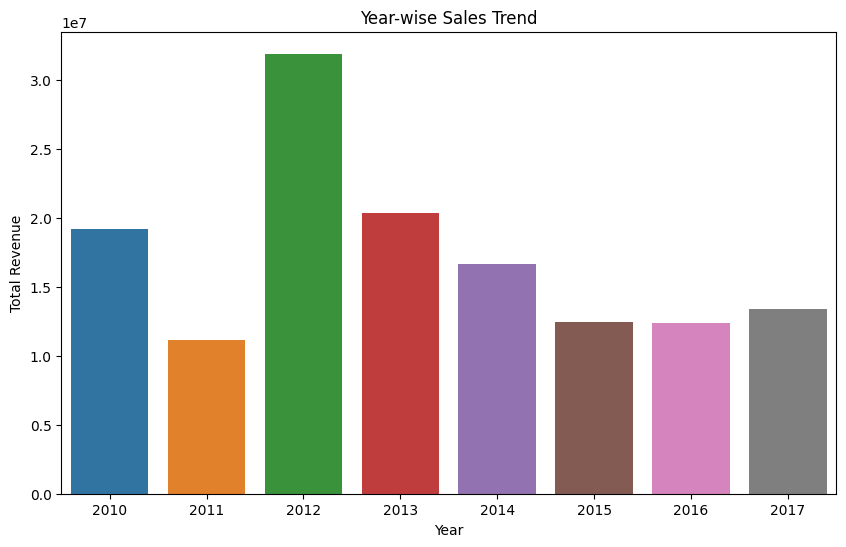

In [14]:
# Year-wise Sales Trend
yearly_sales = df.groupby('Year')['Total Revenue'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

This graph tells us how total sales revenue has changed over the years.It is maximum in year 2012 and minimum in year 2011.It shows if the company is making more money in 2012 and less money in 2011.

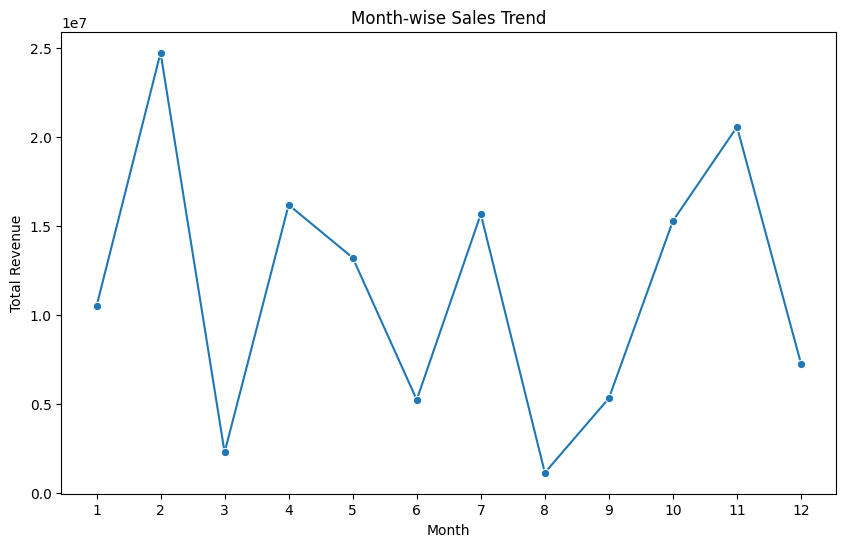

In [15]:
# Month-wise Sales Trend
monthly_sales = df.groupby('Month')['Total Revenue'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.show()

Total Revenue is maximum in month August and minimum in month February.

C:\Users\HP\AppData\Local\Temp\ipykernel_14328\1001380007.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Total Revenue', data=df, estimator=sum, ci=None)


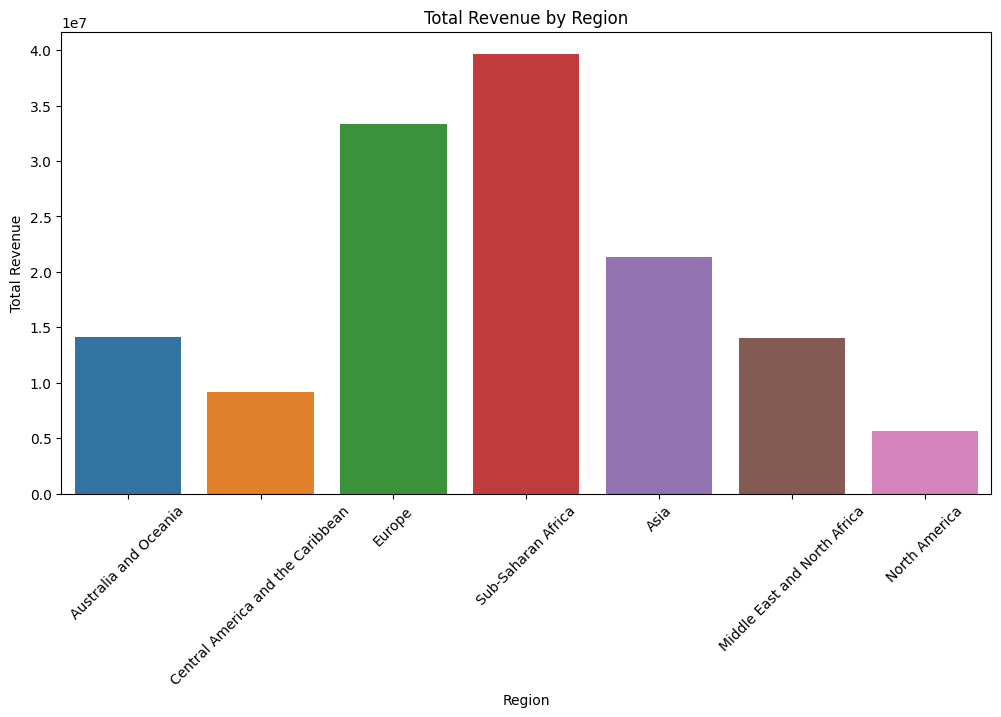

In [16]:
#Barplot of Total Revenue by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total Revenue', data=df, estimator=sum, ci=None)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

This barplot displays the total revenue generated in each region.Sub Saharan Africa region contributing the most to overall revenue, potentially indicating market performance.

C:\Users\HP\AppData\Local\Temp\ipykernel_14328\2368060284.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


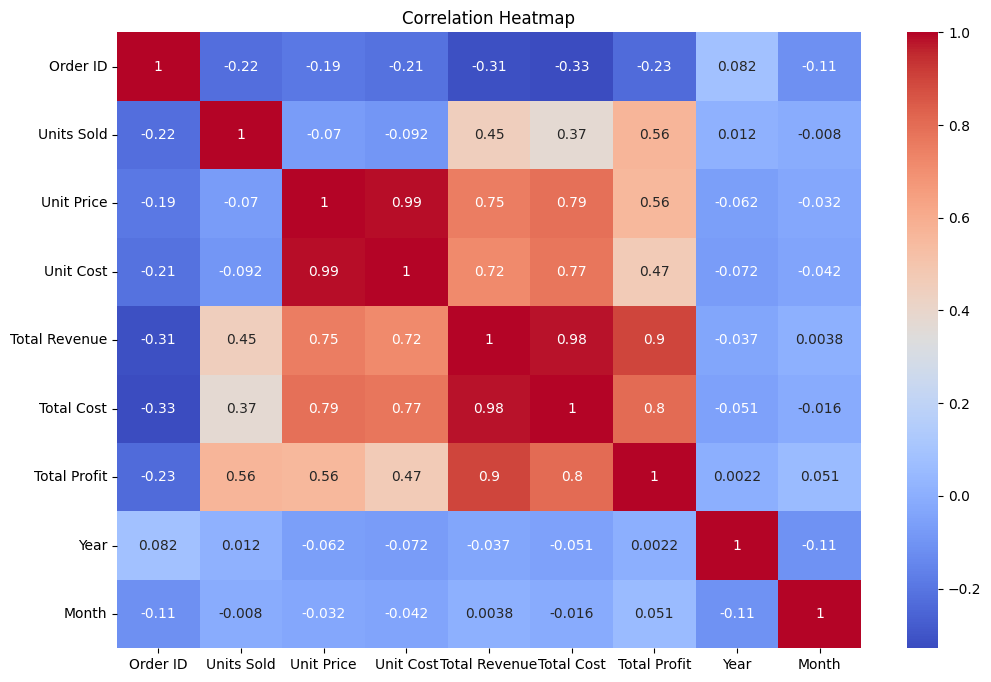

In [17]:
 # Key Metrics and Relationships
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Total cost,Total revenue and Total profit are positively correlated.There is strong positive linear trend and relationship between these 3 variables.

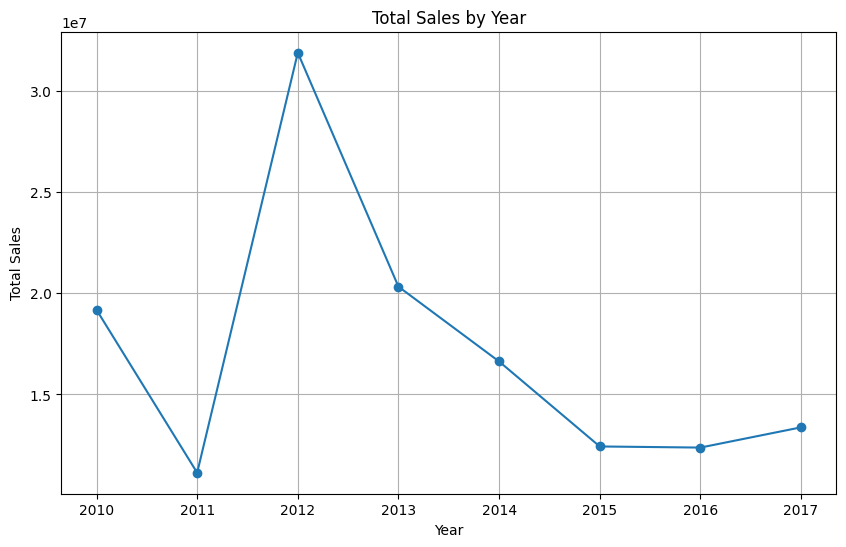

In [18]:
# Extract year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Aggregate sales by year
yearly_sales = df.groupby('Year')['Total Revenue'].sum()

# Plot total sales by year
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(yearly_sales.index)  # Set x-axis ticks to years
plt.show()

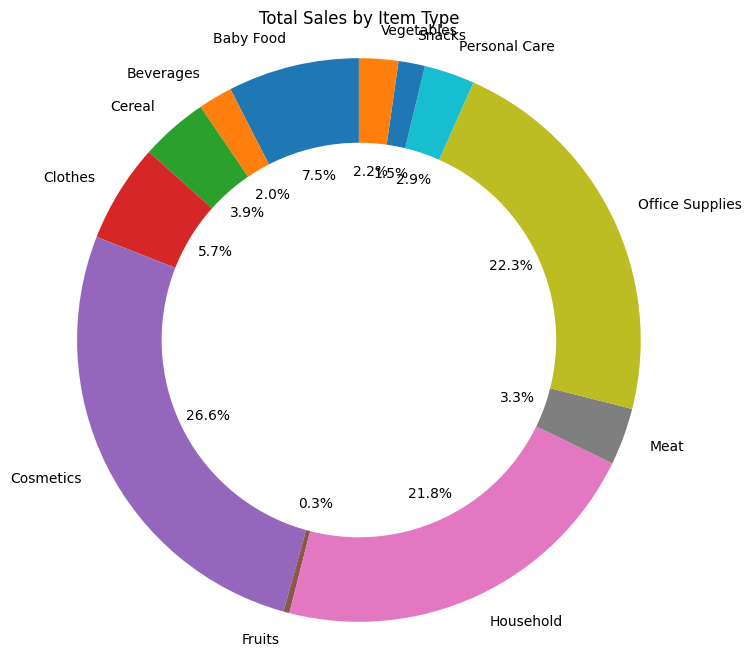

In [19]:
# Group sales data by item type and sum the total revenue
df_item_type = df.groupby('Item Type')['Total Revenue'].sum()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(df_item_type, labels=df_item_type.index, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center of pie to make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Total Sales by Item Type')
plt.axis('equal')
plt.show()

Total sales is maximum in Cosmetics items and minimum in meat items. 

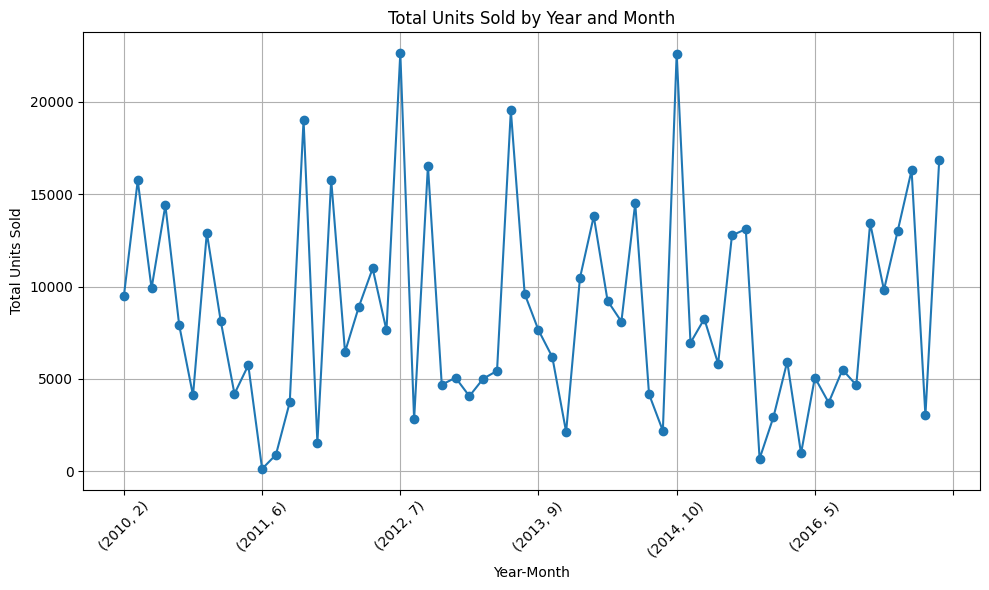

In [20]:
# Extract year and month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group sales data by year and month and sum the total units sold
monthly_units_sold = df.groupby(['Year', 'Month'])['Units Sold'].sum()

# Plot total units sold by year and month
plt.figure(figsize=(10, 6))
monthly_units_sold.plot(marker='o', linestyle='-')
plt.title('Total Units Sold by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Units Sold')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

Maximum units sold in July 2012 and October 2014 and minimum sold in Jun 2011.

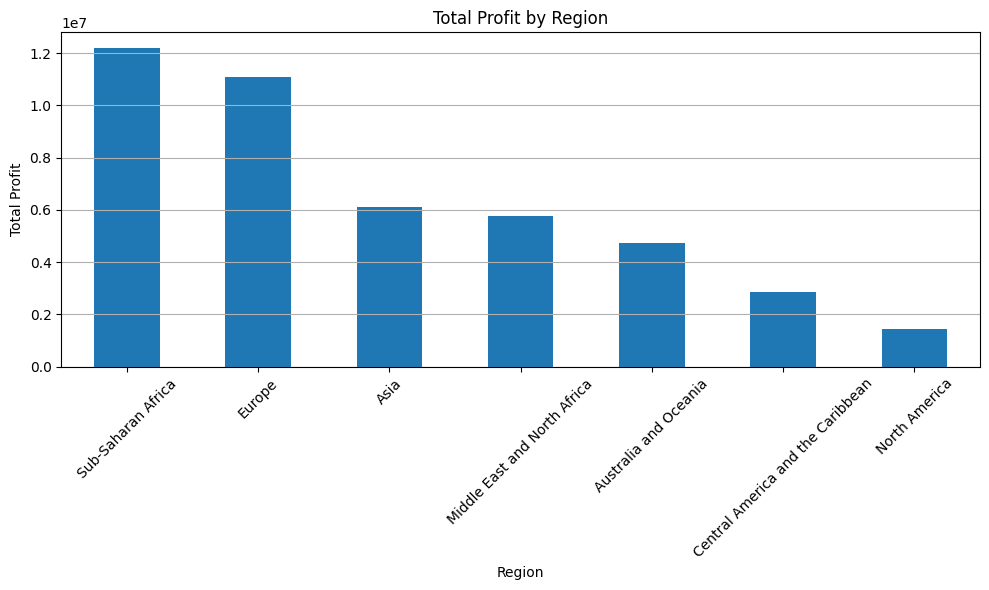

In [21]:
# Group sales data by region and sum the total profit
df_region = df.groupby('Region')['Total Profit'].sum().sort_values(ascending=False)

# Plot total profit by region
plt.figure(figsize=(10, 6))
df_region.plot(kind='bar')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Total profit is maximum in Sub Saharan Africa region and minimum in North America.

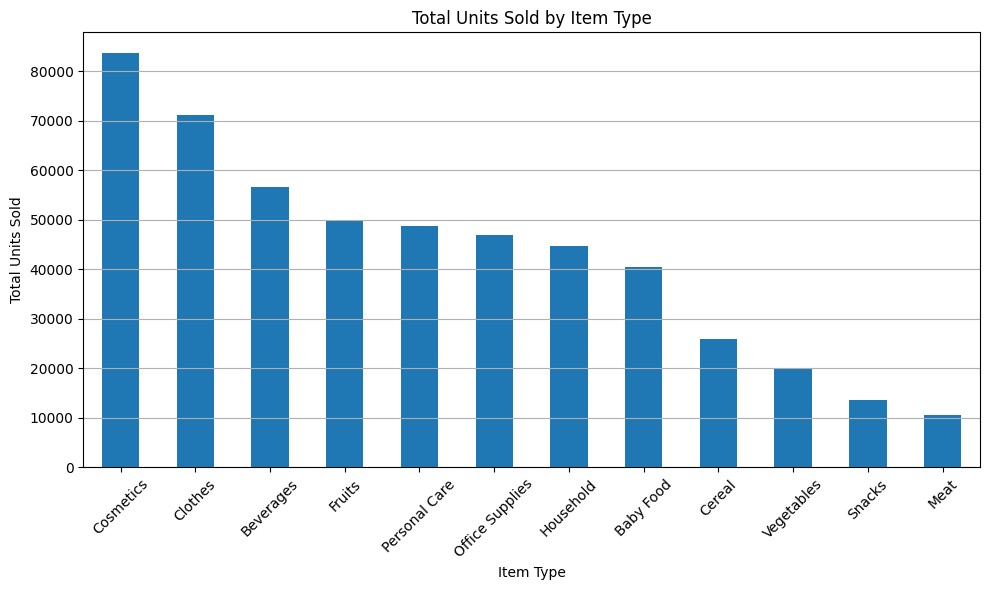

In [22]:
# Group sales data by item type and sum the total units sold
df_item_type = df.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False)

# Plot total units sold by item type
plt.figure(figsize=(10, 6))
df_item_type.plot(kind='bar')
plt.title('Total Units Sold by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Maximum units sold are of cosmetics items and minimum of meat items.

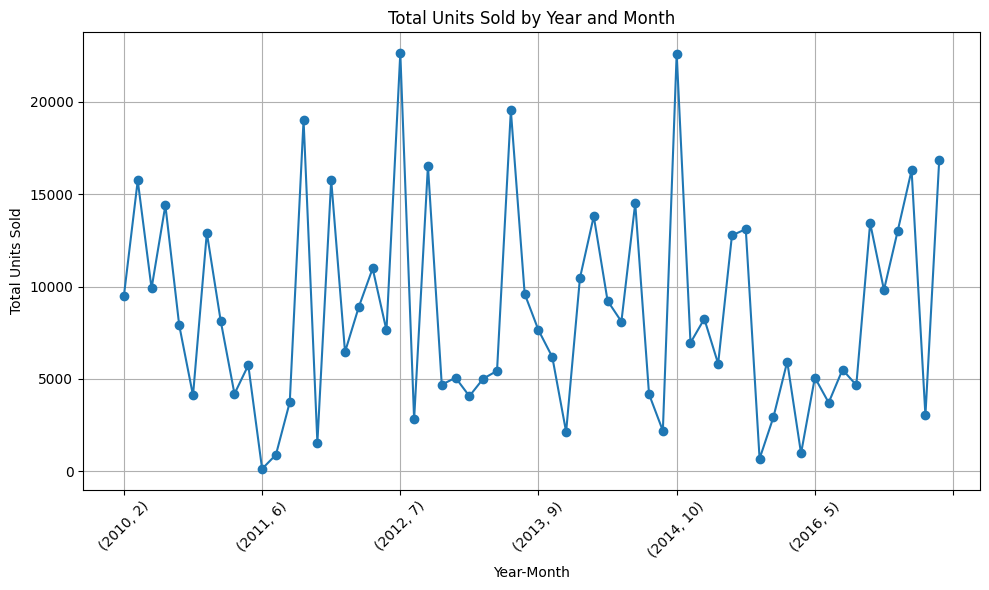

In [23]:
# Extract year and month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group sales data by year and month and sum the total units sold
monthly_units_sold = df.groupby(['Year', 'Month'])['Units Sold'].sum()

# Plot total units sold by year and month
plt.figure(figsize=(10, 6))
monthly_units_sold.plot(marker='o', linestyle='-')
plt.title('Total Units Sold by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Units Sold')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

Maximum units sold in July 2012 ,October 2014 and minimum in Jun 2011.

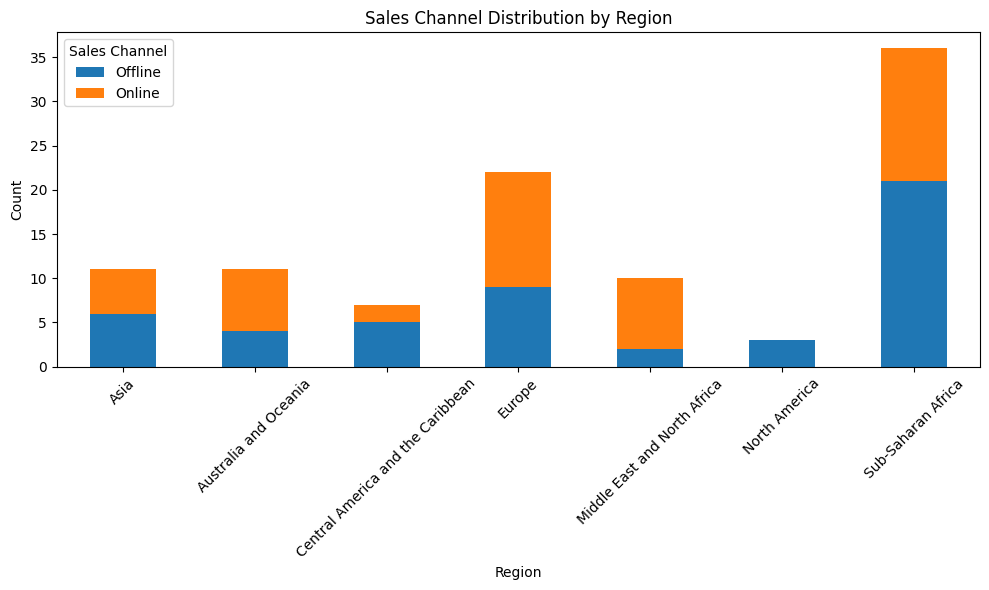

In [24]:
# Stacked Bar Chart of Sales Channel by Region
sales_channel_region = pd.crosstab(df['Region'], df['Sales Channel'])
sales_channel_region.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sales Channel Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

People in all the 7 regions more preferred offline sales channel and less preffered online sales channel.

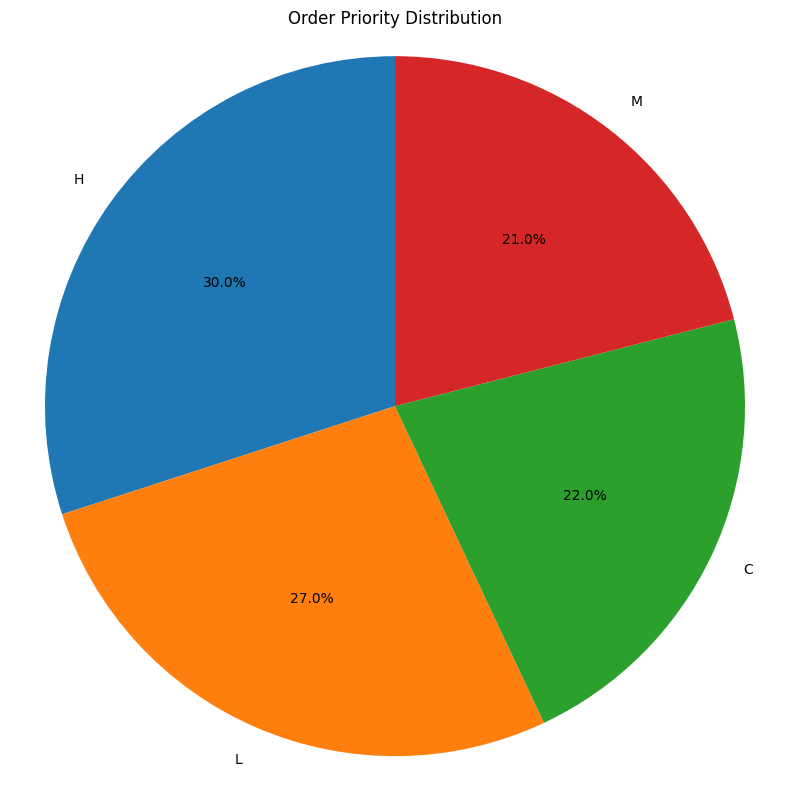

In [25]:
# Pie Chart of Order Priority Distribution
plt.figure(figsize=(8, 8))
order_priority_distribution = df['Order Priority'].value_counts()
plt.pie(order_priority_distribution, labels=order_priority_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Order Priority Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

'H' order priority gave highest sales

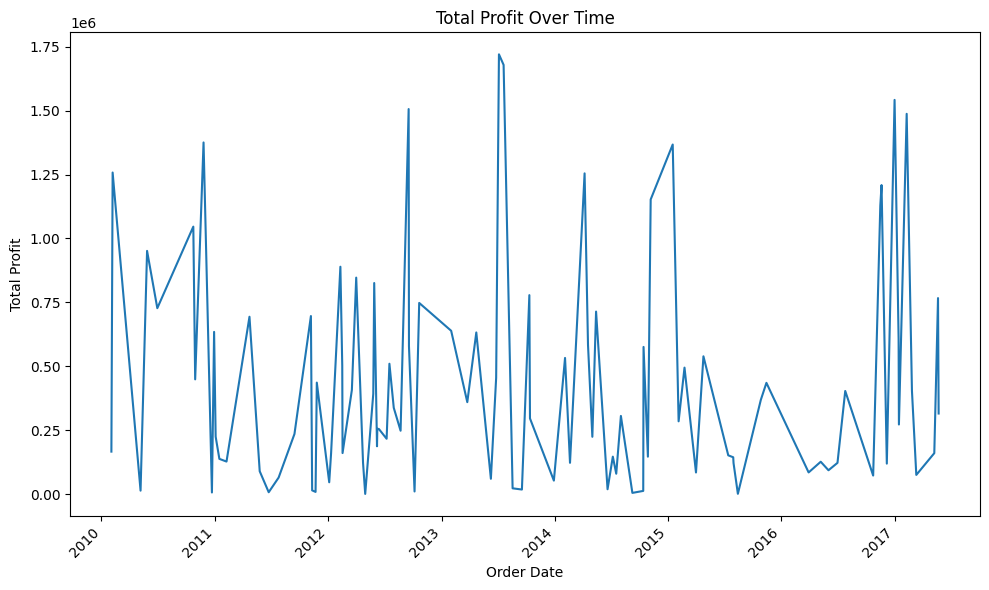

In [26]:
# Line Plot of Total Profit Over Time
profit_over_time = df.groupby('Order Date')['Total Profit'].sum()
plt.figure(figsize=(10, 6))
profit_over_time.plot()
plt.title('Total Profit Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total Profit is maximum between year 2013 to 2014.

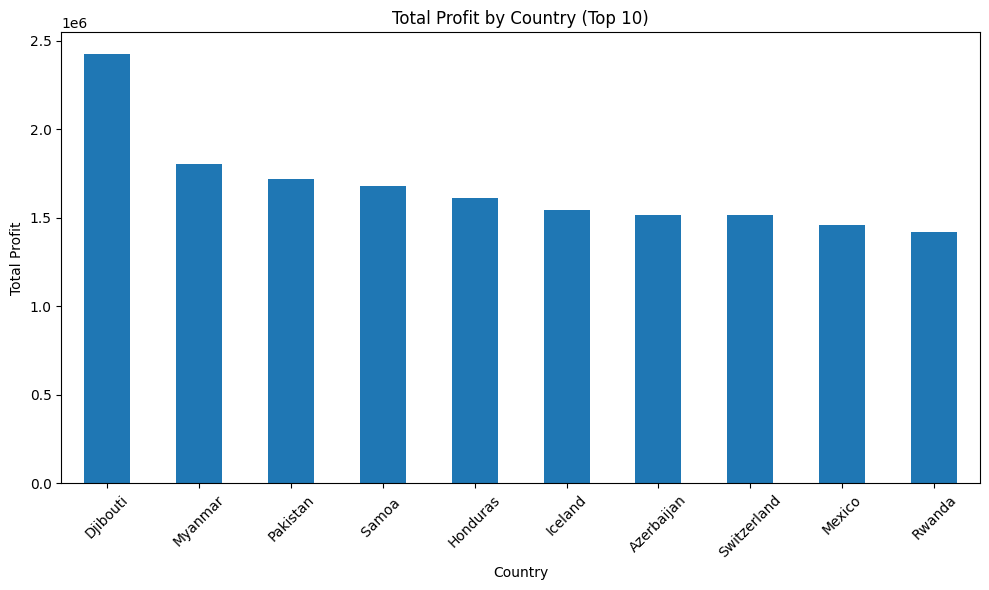

In [27]:
# Bar Chart of Total Profit by Country
profit_by_country = df.groupby('Country')['Total Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
profit_by_country.plot(kind='bar')
plt.title('Total Profit by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total profit is maximum in Djibouti country.

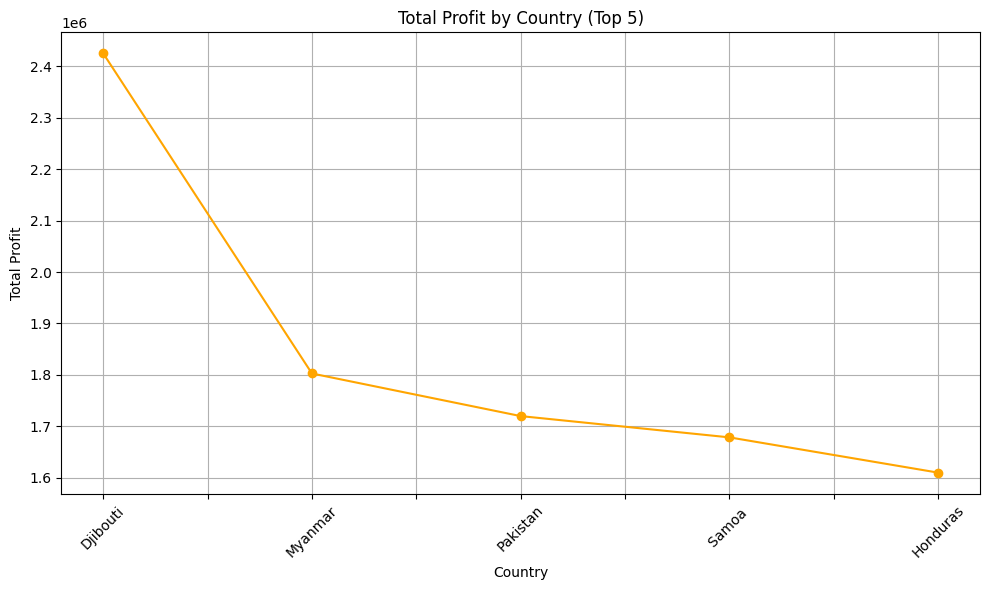

In [28]:
# Line Plot of Total Profit by Country (Top 5)
profit_by_country_top5 = df.groupby('Country')['Total Profit'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
profit_by_country_top5.plot(kind='line', marker='o', color='orange')
plt.title('Total Profit by Country (Top 5)')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

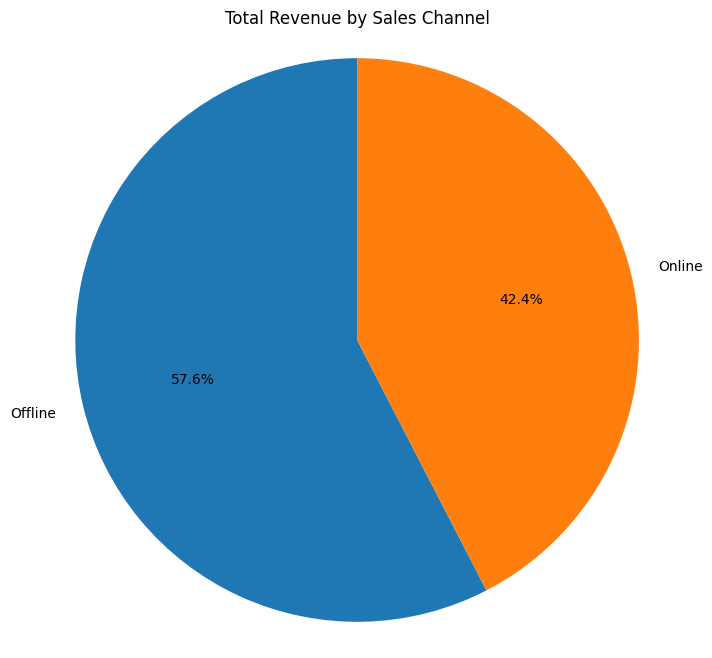

In [29]:
# Group the data by sales channel and calculate the sum of total revenue
revenue_by_channel = df.groupby('Sales Channel')['Total Revenue'].sum()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_channel, labels=revenue_by_channel.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Revenue by Sales Channel')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Total sales revenue is maximum in offline sales channel and minimum in online sales channel.

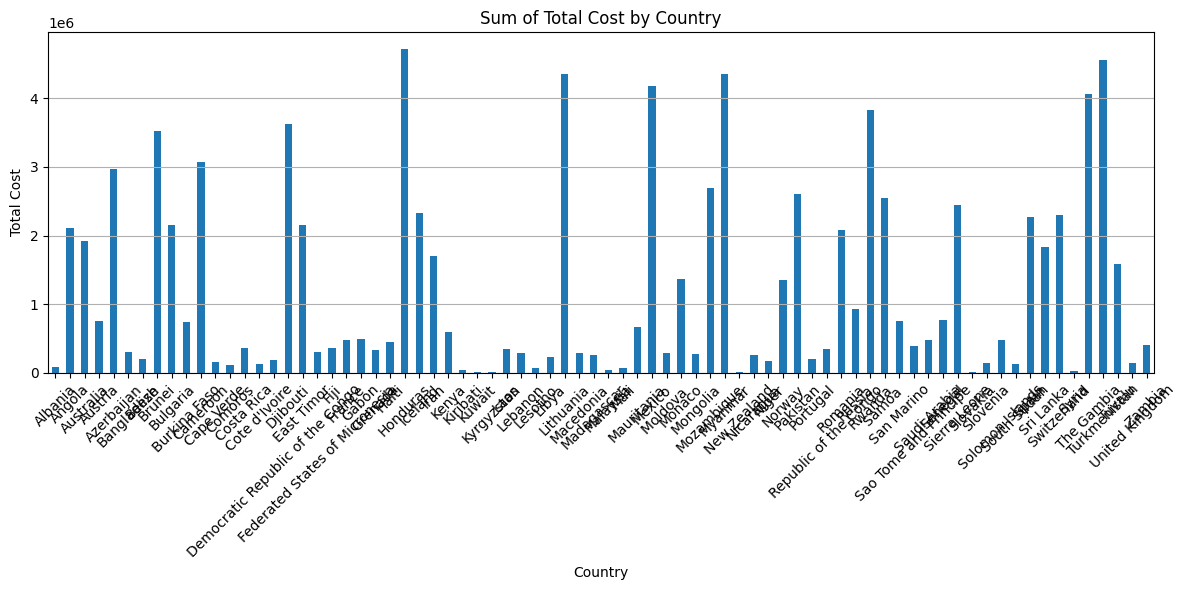

In [30]:
# Group the data by country and calculate the sum of total cost
cost_by_country = df.groupby('Country')['Total Cost'].sum()

# Plot a bar graph
plt.figure(figsize=(12, 6))
cost_by_country.plot(kind='bar')
plt.title('Sum of Total Cost by Country')
plt.xlabel('Country')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines to y-axis
plt.tight_layout()
plt.show()

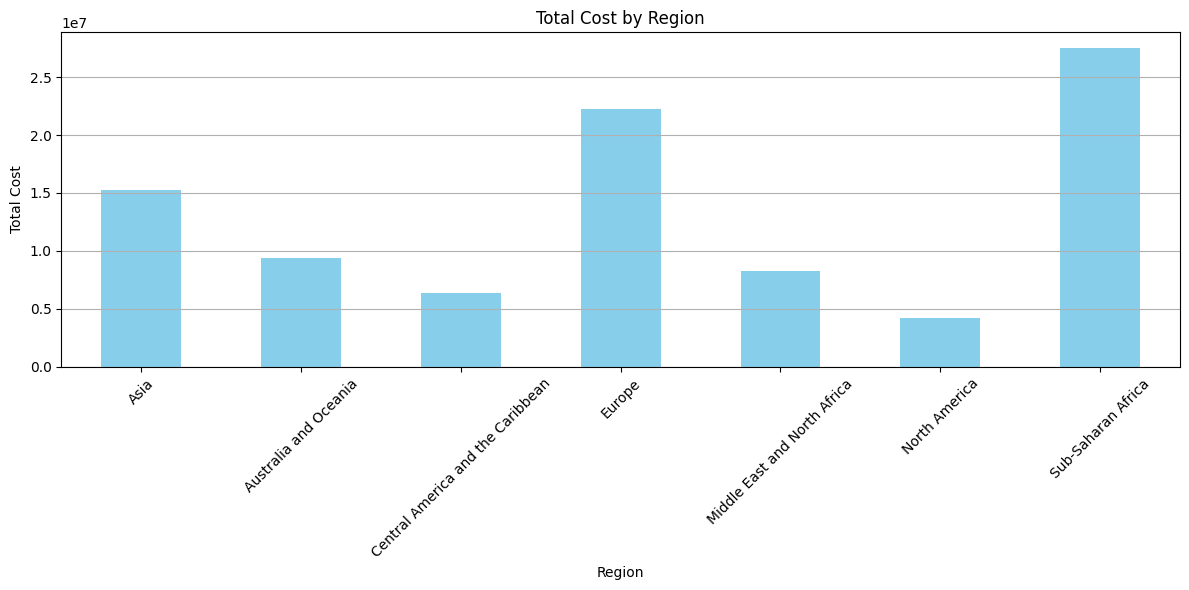

In [31]:
# Group the data by region and calculate the sum of total cost
cost_by_region = df.groupby('Region')['Total Cost'].sum()

# Plot a bar graph
plt.figure(figsize=(12, 6))
cost_by_region.plot(kind='bar', color='skyblue')
plt.title('Total Cost by Region')
plt.xlabel('Region')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines to y-axis
plt.tight_layout()
plt.show()


Total cost is maximum in Sub Saharan Africa region and minimum in North America.

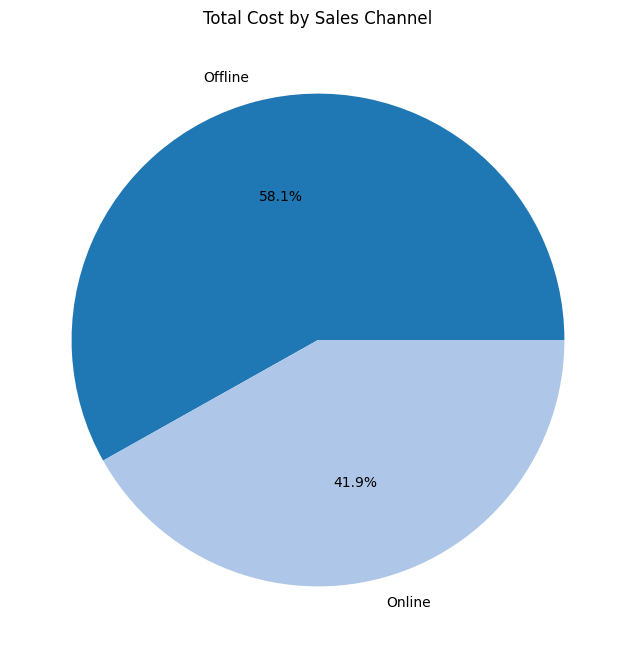

In [32]:
# Group the data by sales channel and calculate the total cost
cost_by_channel = df.groupby('Sales Channel')['Total Cost'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
cost_by_channel.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Total Cost by Sales Channel')
plt.ylabel('')
plt.show()

Total cost is maximum in offline sales channel and minimum in online sales channel.

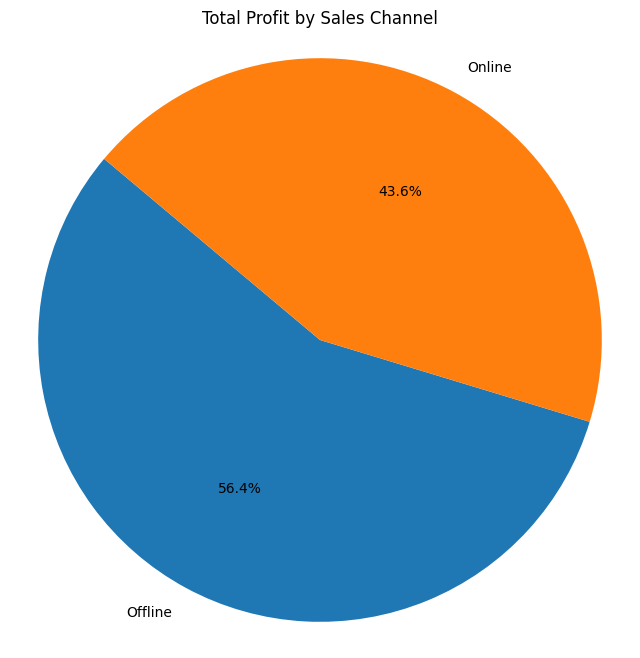

In [33]:
# Calculate total profit by sales channel
profit_by_channel = df.groupby('Sales Channel')['Total Profit'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(profit_by_channel, labels=profit_by_channel.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Profit by Sales Channel')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Total profit is maximum in offline sales channel and minimum in online sales channel.